In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# Download historical stock data for Apple (AAPL)
data = yf.download('AAPL', start='2020-01-01', end='2023-12-31')

# Show the first 5 rows
data.head()


C:\Users\hz689\AppData\Local\Temp\ipykernel_1368\3734644319.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914833,72.676462,71.689973,71.847133,146322800
2020-01-06,72.487862,72.526549,70.783263,71.034724,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [3]:
# Shift the Close column by -1 to get the next day's closing price
data['Next_Close'] = data['Close'].shift(-1)

# Drop the last row because it has no Next_Close value
data = data[:-1]

# Select features
X = data[['Open', 'High', 'Low', 'Volume']]

# Target variable
y = data['Next_Close']


In [4]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)


In [5]:
# Create the Linear Regression model
model = LinearRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [6]:
# Predict the next day's closing prices for the test set
y_pred = model.predict(X_test)


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Mean Absolute Error (MAE): 2.01
Root Mean Squared Error (RMSE): 2.69


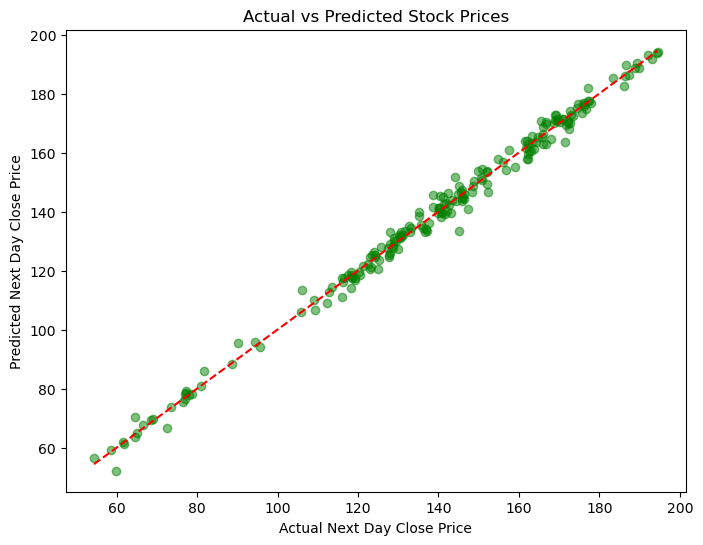

In [9]:
# Scatter plot: Actual vs Predicted closing prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.xlabel("Actual Next Day Close Price")
plt.ylabel("Predicted Next Day Close Price")
plt.title("Actual vs Predicted Stock Prices")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'  # Reference line
)
plt.show()
